<a href="https://colab.research.google.com/github/DorotaJanosz/machine-learning-bootcamp/blob/master/unsupervised/01_clustering/03_kmeans_elbow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import bibliotek

In [46]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

###Wygenerowanie danych

In [47]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

px.scatter(data_frame=df, x='x1', y='x2', width=950, height=500, title='Algorytm K-średnich', template='plotly_dark')

###Algorytm K-średnich

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
# wcss

kmeans.inertia_

3869.9032827815113

In [50]:
y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-6.645730,5.470461,3
1,-4.390559,-5.055149,1
2,-4.666211,-5.390080,1
3,3.022862,0.303769,2
4,3.322516,-0.676179,2


In [51]:
px.scatter(data_frame=df, x='x1', y='x2', color='y_kmeans', width=950, height=500, title='Algorytm K-średnich - 5 klastrów', template='plotly_dark')

###WCSS - Within-Cluster-Sum-of-Squared

In [52]:
wcss = []

for i in range(2, 10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

print(wcss)

[23414.040458695992, 7734.886635126097, 4282.137026938608, 3851.9179222480348, 3444.0479686067747, 3036.444639126243, 2714.581537394107, 2470.4309754628]


In [53]:
wcss = pd.DataFrame(wcss, columns=['wcss'])
wcss = wcss.reset_index()
wcss = wcss.rename(columns={'index': 'clusters'})
wcss['clusters'] += 2
wcss

,clusters,wcss
0,2,23414.040459
1,3,7734.886635
2,4,4282.137027
3,5,3851.917922
4,6,3444.047969
5,7,3036.444639
6,8,2714.581537
7,9,2470.430975


###Metoda "łokcia" - elbow method

In [54]:
px.line(data_frame=wcss, x='clusters', y='wcss', width=950, height=500, title='Whitin-Clusters-Sum-of-Squared (WCSS)', template='plotly_dark')

###Wizualizacja klastrów

In [55]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-6.645730,5.470461,0
1,-4.390559,-5.055149,1
2,-4.666211,-5.390080,1
3,3.022862,0.303769,2
4,3.322516,-0.676179,2


In [56]:
px.scatter(data_frame=df, x='x1', y='x2', color='y_kmeans', title='Algorytm K-średnich - 3 klastry', width=950, height=500, template='plotly_dark')

In [57]:
kmeans.cluster_centers_

array([[-4.67830594,  6.63353943],
       [-5.30241342, -5.40419963],
       [ 3.63034824,  1.80837659]])

In [63]:
centres = pd.DataFrame(data=kmeans.cluster_centers_, columns=['c1', 'c2'])
centres

,c1,c2
0,-4.678306,6.633539
1,-5.302413,-5.404200
2,3.630348,1.808377


In [71]:
fig = px.scatter(data_frame=df, x='x1', y='x2', color='y_kmeans', title='Algorytm K-średnich - 3 klastry', width=950, height=500, template='plotly_dark')
fig.add_trace(go.Scatter(x=centres['c1'], y=centres['c2'], mode='markers', marker={'size': 12, 'color': 'LightSkyBlue', 'line': {'width':2, 'color': 'tomato'}},showlegend=False))

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



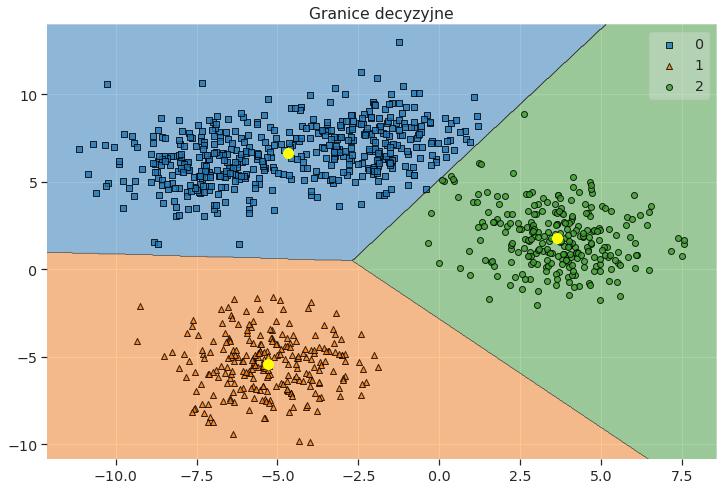

In [82]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12, 8))
plot_decision_regions(data, y_means, clf=kmeans)
plt.title('Granice decyzyjne')
plt.scatter(x=centres['c1'], y=centres['c2'], s=100, c='yellow')
plt.show()